# Further Data Exploration
- Extract some features from user behavior sequence by hand
- Check the distribution of the features, group by label.
- Fit a logistic regression model. --ks=0.1382
- Fit a Random Forest Model. --ks=0.1372

In [1]:
import pandas as pd
import numpy as np
import json
data_dir = '../../data/processed/'

In [2]:
with open(data_dir+'label.json') as f:
    labels=json.load(f)
with open(data_dir+'non_sequential_features.json') as f:
    non_sequential_features=json.load(f)
with open(data_dir+'padded_sequential_features_3.json') as f:
    sequential_features=json.load(f)

In [3]:
matrix = pd.DataFrame()
x = 0
for key in list(labels.keys()):
    dic = {}
    label = labels[key]
    dic["label"] = label
    non_seq = non_sequential_features[key]
    col = ["new_user", "1", "2", "3", "4", "5", "6", "7",
           "1_time", "2_time", "3_time", "4_time", "5_time", "6_time"]
    for f in range(len(col)):
        dic[col[f]] = non_seq[f]
    seq = sequential_features[key]
    seq = [i for i in seq if i != [-1]*18]
    seq = np.array(seq)
    pid_change = np.sum(seq[:, 16])
    dic["pid_change"] = pid_change
    sid_change = np.sum(seq[:, 17])
    dic["sid_change"] = sid_change
    lagtime_total = np.sum(seq[:, 15])
    dic["lagtime_total"] = lagtime_total
    staytime_total = np.sum(seq[:, 14])
    dic["staytime_total"] = staytime_total
    pages = list(range(13))
    for i in pages:
        page_sub = seq[seq[:, 0] == i]
        dic[str(i)+"_"+"stay_time"] = np.sum(page_sub[:, 14])
        dic[str(i)+"_"+"lag_time"] = np.sum(page_sub[:, 15])
        cnt = np.sum(page_sub[:, i+1])
        dic[str(i)+"_"+"cnt"] = cnt
        if cnt > 0:
            dic[str(i)+"_"+"avg_stay_time"] = np.sum(np.sum(page_sub[:, 14])
                                                     )/np.sum(page_sub[:, i+1])
            dic[str(i)+"_"+"avg_lag_time"] = np.sum(np.sum(page_sub[:, 15])
                                                    )/np.sum(page_sub[:, i+1])
        else:
            dic[str(i)+"_"+"avg_stay_time"] = 0
            dic[str(i)+"_"+"avg_lag_time"] = np.nan
    df = pd.DataFrame(dic, index=[0])
    matrix = matrix.append(df)
    x += 1
    if x % 10000 == 0:
        print(str(x)+"/"+str(len(list(labels.keys()))))

In [4]:
matrix.head()

,label,new_user,1,2,3,4,5,6,7,1_time,...,11_stay_time,11_lag_time,11_cnt,11_avg_stay_time,11_avg_lag_time,12_stay_time,12_lag_time,12_cnt,12_avg_stay_time,12_avg_lag_time
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN


In [5]:
matrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3715 entries, 0 to 0
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   label             3715 non-null   float64
 1   new_user          3715 non-null   float64
 2   1                 3715 non-null   float64
 3   2                 3715 non-null   float64
 4   3                 3715 non-null   float64
 5   4                 3715 non-null   float64
 6   5                 3715 non-null   float64
 7   6                 3715 non-null   float64
 8   7                 3715 non-null   float64
 9   1_time            3715 non-null   float64
 10  2_time            3715 non-null   float64
 11  3_time            3715 non-null   float64
 12  4_time            3715 non-null   float64
 13  5_time            3715 non-null   float64
 14  6_time            3715 non-null   float64
 15  pid_change        3715 non-null   float64
 16  sid_change        3715 non-null   float64
 17

In [6]:
col=list(matrix.columns)
col.remove("label")
import matplotlib.pyplot as plt

Benign users:  0.18607338919387462  Fraud:  0.3543307086614173


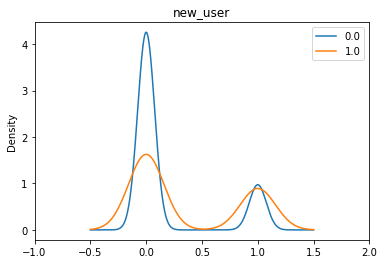

Benign users:  0.15862467494943658  Fraud:  0.16141732283464566


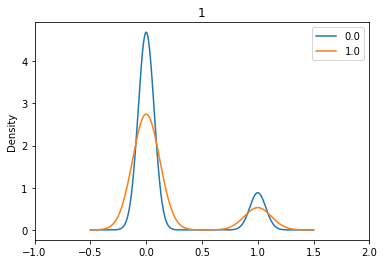

Benign users:  0.13290956370991044  Fraud:  0.1377952755905512


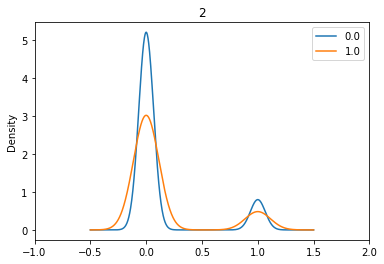

Benign users:  0.1305980930366946  Fraud:  0.12598425196850394


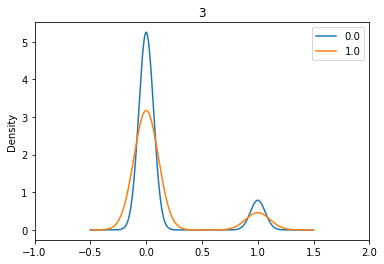

Benign users:  0.13175382837330252  Fraud:  0.11023622047244094


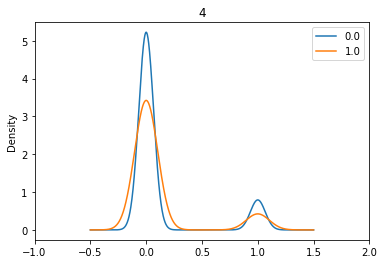

Benign users:  0.13233169604160647  Fraud:  0.15748031496062992


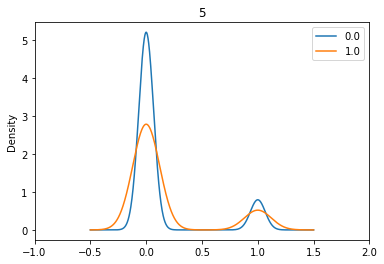

Benign users:  0.1418665125686218  Fraud:  0.14960629921259844


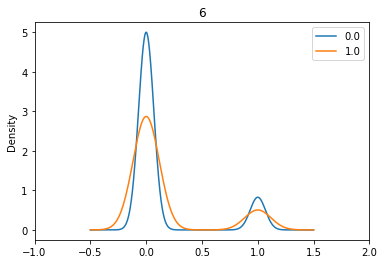

Benign users:  0.17191563132042761  Fraud:  0.15748031496062992


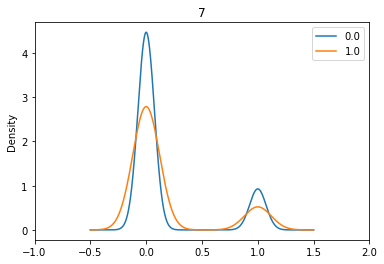

Benign users:  0.18694019069633053  Fraud:  0.2795275590551181


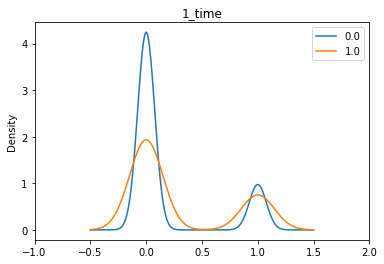

Benign users:  0.11095059231436001  Fraud:  0.09448818897637795


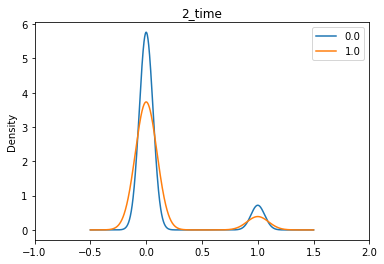

Benign users:  0.05749783299624386  Fraud:  0.05905511811023622


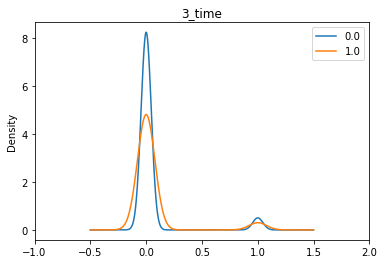

Benign users:  0.08494654724068189  Fraud:  0.08267716535433071


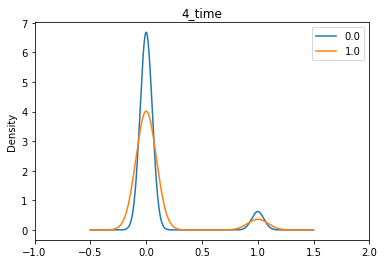

Benign users:  0.3019358566888183  Fraud:  0.23622047244094488


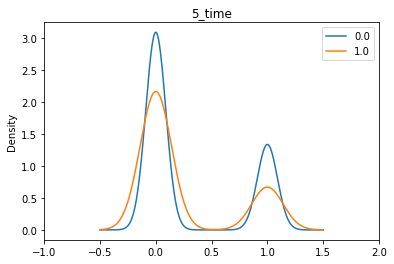

Benign users:  0.2577289800635654  Fraud:  0.24803149606299213


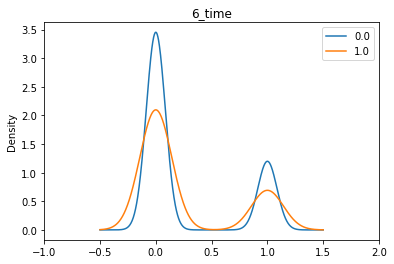

Benign users:  5.610517191563132  Fraud:  5.956692913385827


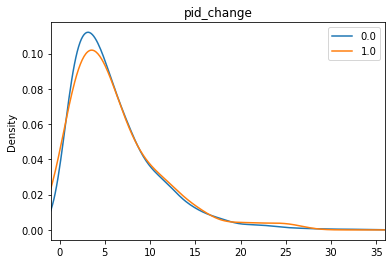

Benign users:  10.067899451025715  Fraud:  10.192913385826772


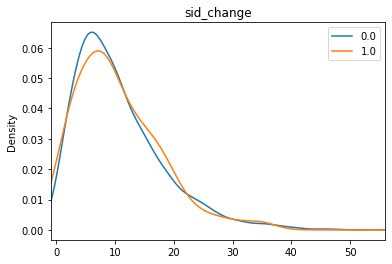

Benign users:  17.53086086159944  Fraud:  17.79700295363956


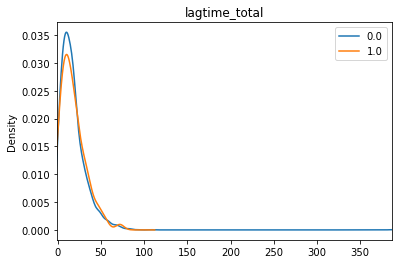

Benign users:  26.237519703303974  Fraud:  26.578174370603566


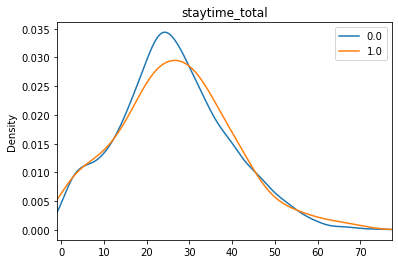

Benign users:  1.0701046651106279  Fraud:  1.1170626644450277


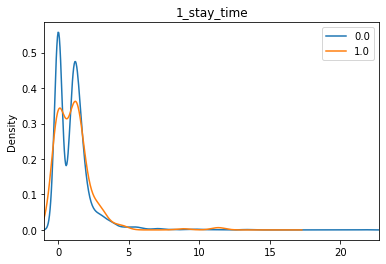

Benign users:  0.2802956916143243  Fraud:  0.28389722489711544


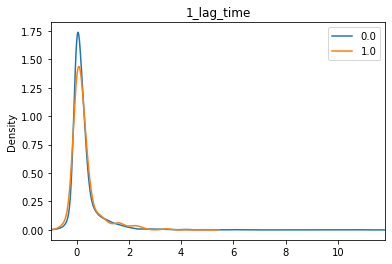

Benign users:  0.12973129153423865  Fraud:  0.11023622047244094


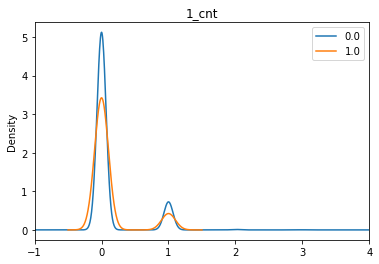

Benign users:  0.28241484083274526  Fraud:  0.21903550231418623


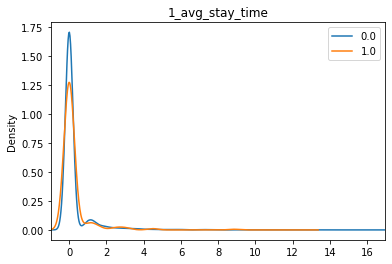

Benign users:  0.7036857300518963  Fraud:  0.6283368655879583


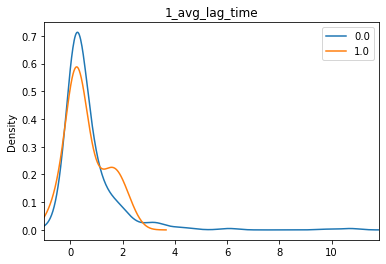

Benign users:  0.027743312750066577  Fraud:  0.007097130920004657


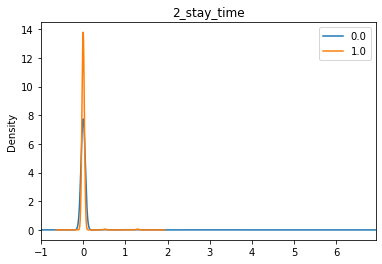

Benign users:  0.009408047775544465  Fraud:  0.0021832626400970097


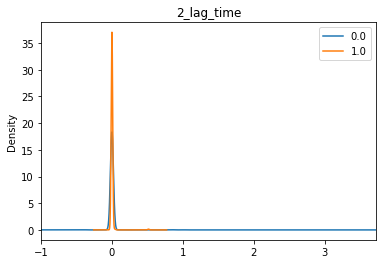

C:\Users\Harry\Anaconda3\envs\tensorflow-gpu\lib\site-packages\pandas\plotting\_matplotlib\hist.py:119: RuntimeWarning: All-NaN slice encountered
  sample_range = np.nanmax(y) - np.nanmin(y)
C:\Users\Harry\Anaconda3\envs\tensorflow-gpu\lib\site-packages\pandas\plotting\_matplotlib\hist.py:121: RuntimeWarning: All-NaN slice encountered
  np.nanmin(y) - 0.5 * sample_range,
C:\Users\Harry\Anaconda3\envs\tensorflow-gpu\lib\site-packages\pandas\plotting\_matplotlib\hist.py:122: RuntimeWarning: All-NaN slice encountered
  np.nanmax(y) + 0.5 * sample_range,


Benign users:  1.4646684661793112  Fraud:  1.5887399651440168


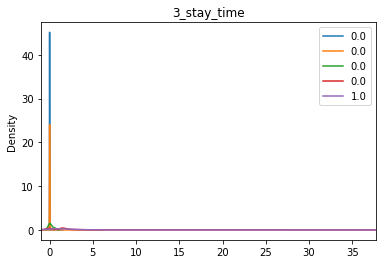

Benign users:  0.17071197800062005  Fraud:  0.19523126274845967


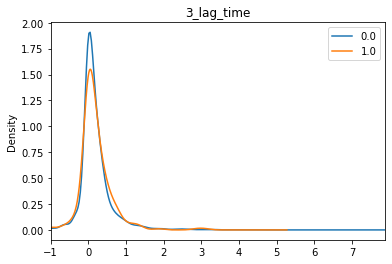

Benign users:  0.08985842242126553  Fraud:  0.07874015748031496


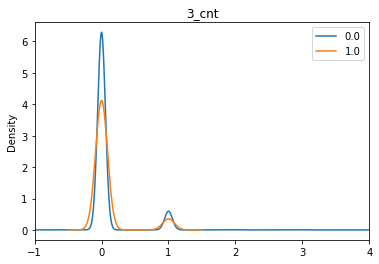

Benign users:  0.3070774219750689  Fraud:  0.28340434206752324


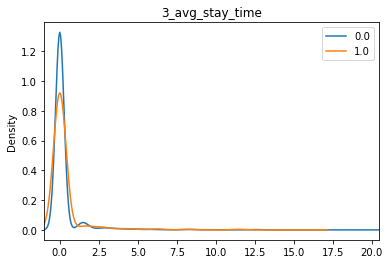

Benign users:  0.29135666941096006  Fraud:  0.41345426328480245


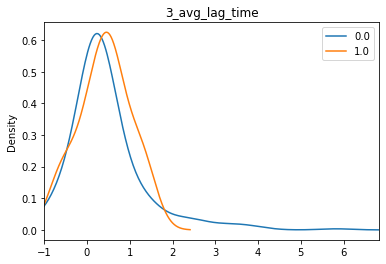

Benign users:  1.3983414482019443  Fraud:  1.4367288797488802


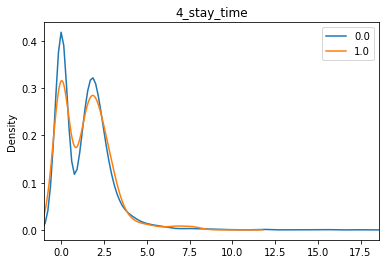

Benign users:  0.3494280576110944  Fraud:  0.244052764009061


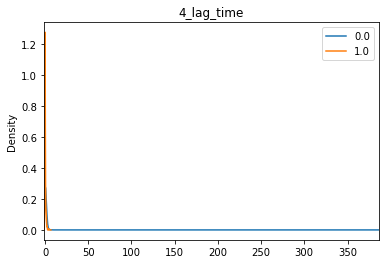

Benign users:  0.22941346431667148  Fraud:  0.2637795275590551


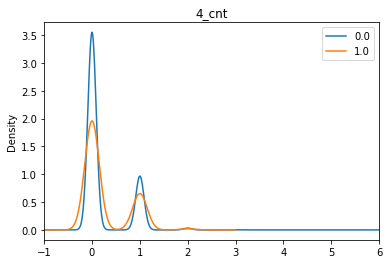

Benign users:  0.5595179302496074  Fraud:  0.6239025412956033


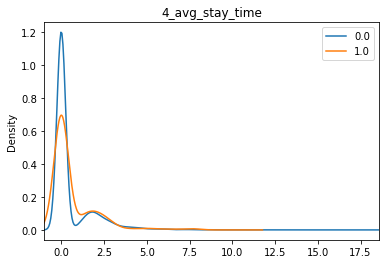

Benign users:  0.6097728545152238  Fraud:  0.4515198437192549


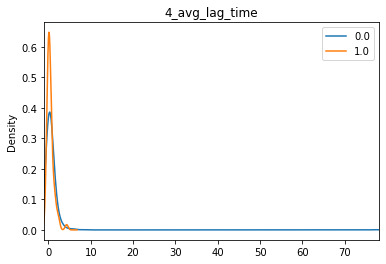

Benign users:  1.4608658457335797  Fraud:  1.4529213941045103


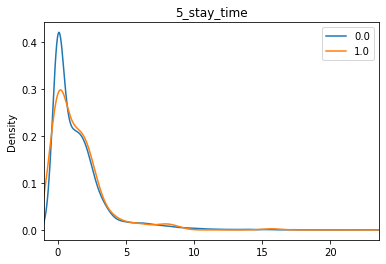

Benign users:  0.7239737998429095  Fraud:  0.6143324738025792


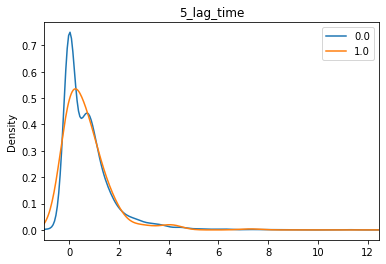

Benign users:  0.23808147934123086  Fraud:  0.27165354330708663


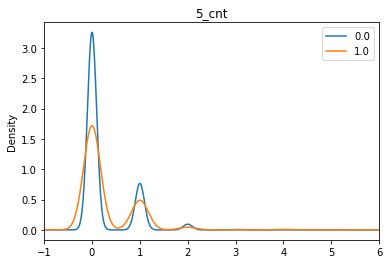

Benign users:  0.6146933427890668  Fraud:  0.6725354305840662


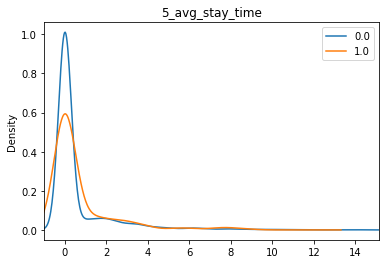

Benign users:  1.4151847745862622  Fraud:  1.159467639295159


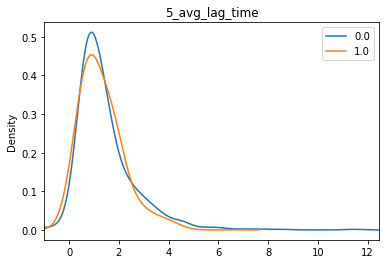

Benign users:  13.36590799184518  Fraud:  13.480588985177976


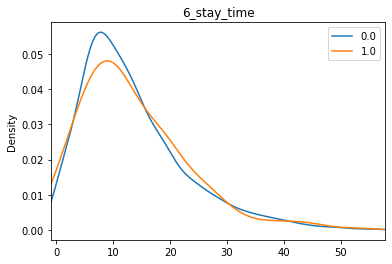

Benign users:  14.357481517444027  Fraud:  14.685330315156857


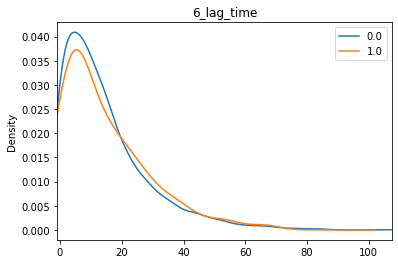

Benign users:  1.3496099393238947  Fraud:  1.279527559055118


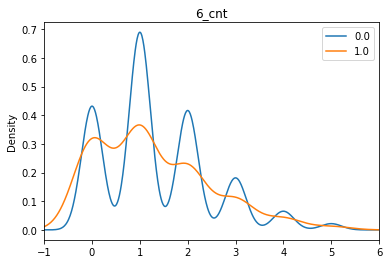

Benign users:  7.0402678721635095  Fraud:  6.636893349462173


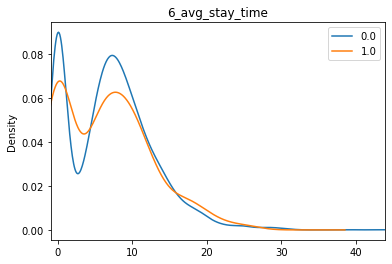

Benign users:  9.768513891207958  Fraud:  9.940157388692509


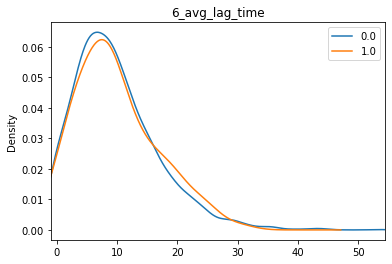

Benign users:  1.9110540106818217  Fraud:  2.042300560196319


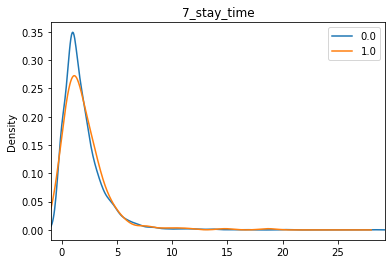

Benign users:  0.16238081479341232  Fraud:  0.2047244094488189


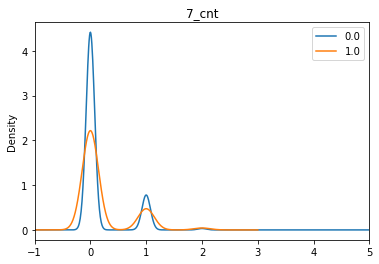

Benign users:  0.47937531337319655  Fraud:  0.7146579918898935


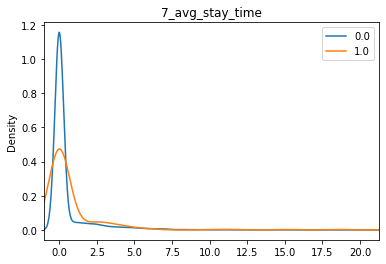

Benign users:  1.259622338889571  Fraud:  1.3566411975917854


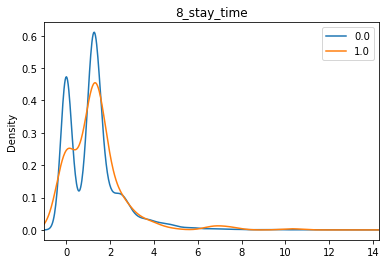

Benign users:  1.0340168439723687  Fraud:  1.0796162263732256


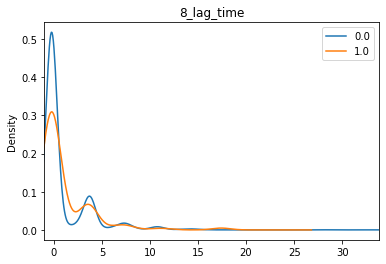

Benign users:  0.08581334874313783  Fraud:  0.08661417322834646


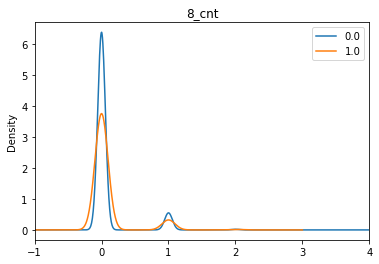

Benign users:  0.1907792720568039  Fraud:  0.2219694218062979


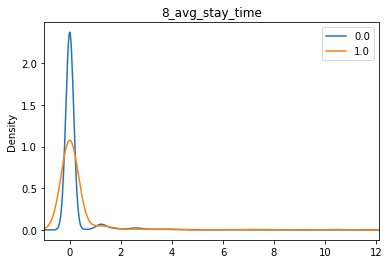

Benign users:  2.8498624012484193  Fraud:  2.6879092440718697


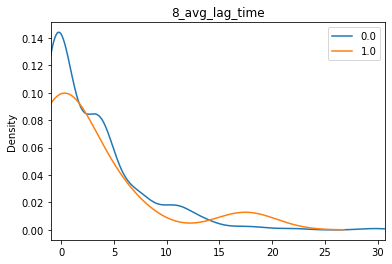

Benign users:  3.109114472978881  Fraud:  2.8563637145039604


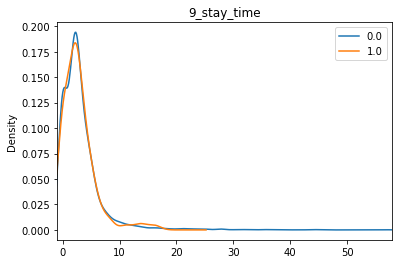

Benign users:  0.5409811569862484  Fraud:  0.5420859034290523


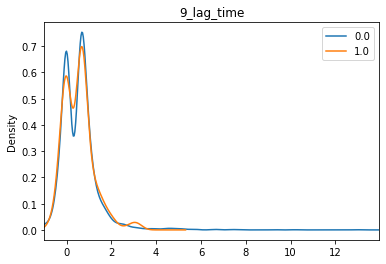

Benign users:  0.1609361456226524  Fraud:  0.16141732283464566


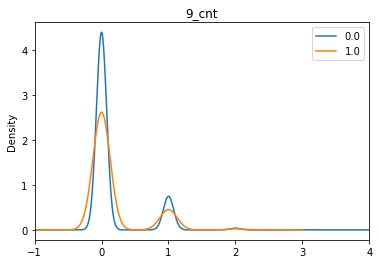

Benign users:  0.9666379452505335  Fraud:  0.7344685166956871


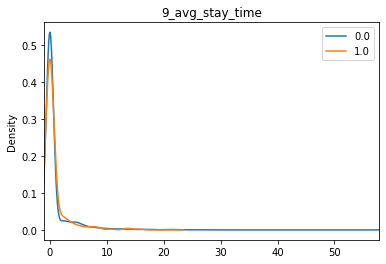

Benign users:  0.9250514682736848  Fraud:  0.6499909852237369


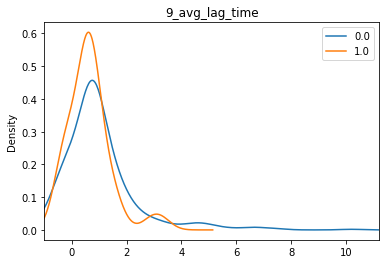

Benign users:  0.9659701739493252  Fraud:  1.0226609519805199


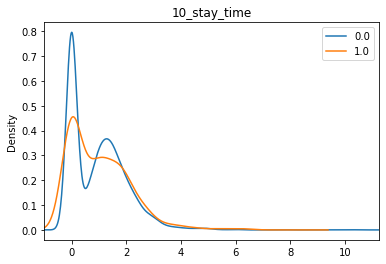

Benign users:  0.37989524598887353  Fraud:  0.44143067878408826


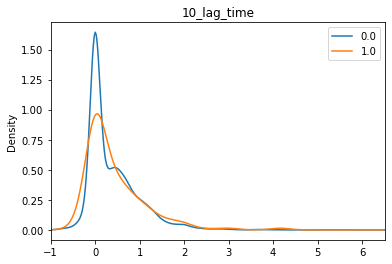

Benign users:  0.31031493787922565  Fraud:  0.3464566929133858


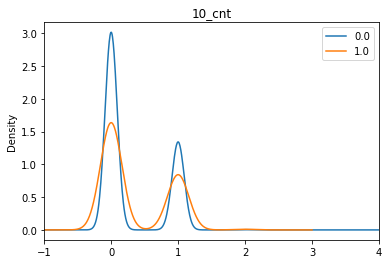

Benign users:  0.49518126803134327  Fraud:  0.5551220362583875


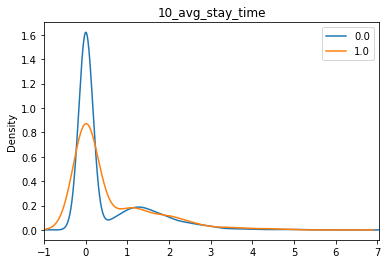

Benign users:  0.6190360907638294  Fraud:  0.596560099045077


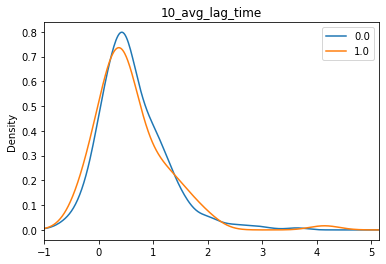

Benign users:  0.20412697698366639  Fraud:  0.21706892679056783


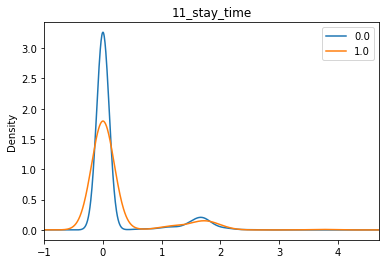

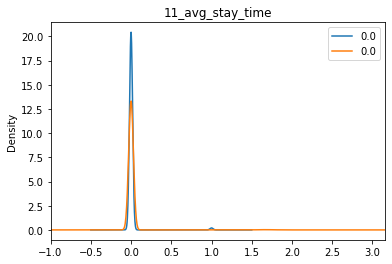

In [7]:
for i in col:
    try:
        if np.sum(matrix[i]) > 0:
            xlim = (-1, np.max(matrix[i])+1)
            matrix.groupby("label")[i].plot(kind="density", xlim=xlim, legend=True, title=i)
            a = matrix.groupby("label").mean()[i]
            print("Benign users: ", a.loc[0], " Fraud: ", a.loc[1])
            plt.show()
    except:
        continue

- Above shows the distribution of each features of benign users and default users
- Benign users and default users possess very similar distributions in most of the features 
- Benign users and default users have significant different distribution in terms of  features "2_avg_lag_time" and "new_user", however, "2_avg_lag_time" only contains 397 non-null samples

In [8]:
matrix.head()

,label,new_user,1,2,3,4,5,6,7,1_time,...,11_stay_time,11_lag_time,11_cnt,11_avg_stay_time,11_avg_lag_time,12_stay_time,12_lag_time,12_cnt,12_avg_stay_time,12_avg_lag_time
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,NaN


#### Fit a logistic regression model

In [9]:
# all the missing values are stay time, lag time, or page view cnt, not binary variables
lgr_matrix = matrix.fillna(0)

In [10]:
corr2 = lgr_matrix.corr()["label"].sort_values(ascending=False)

In [11]:
col = list(corr2[np.abs(corr2) > 0.005].index.values)
col.remove("label")

In [12]:
col

['new_user',
 '1_time',
 '7_avg_stay_time',
 '7_cnt',
 '10_lag_time',
 '11_avg_lag_time',
 '10_cnt',
 '4_cnt',
 '8_stay_time',
 '5',
 '10_avg_stay_time',
 '5_cnt',
 '7_stay_time',
 '3_stay_time',
 'pid_change',
 '10_stay_time',
 '4_avg_stay_time',
 '7_avg_lag_time',
 '3_lag_time',
 '8_avg_stay_time',
 '5_avg_stay_time',
 '7_lag_time',
 '1_stay_time',
 '10_avg_lag_time',
 'staytime_total',
 '11_stay_time',
 '6_lag_time',
 '6',
 '4_stay_time',
 '6_time',
 '5_avg_lag_time',
 '2_avg_lag_time',
 '2_avg_stay_time',
 '3_cnt',
 '7',
 '1_avg_lag_time',
 '2_cnt',
 '2_time',
 '1_cnt',
 '1_avg_stay_time',
 '6_cnt',
 '6_avg_lag_time',
 '4',
 '9_avg_lag_time',
 '9_stay_time',
 '2_lag_time',
 '6_avg_stay_time',
 '9_avg_stay_time',
 '2_stay_time',
 '5_lag_time',
 '11_avg_stay_time',
 '11_cnt',
 '5_time']

In [13]:
lgr_matrix[col].corr()

,new_user,1_time,7_avg_stay_time,7_cnt,10_lag_time,11_avg_lag_time,10_cnt,4_cnt,8_stay_time,5,...,9_avg_lag_time,9_stay_time,2_lag_time,6_avg_stay_time,9_avg_stay_time,2_stay_time,5_lag_time,11_avg_stay_time,11_cnt,5_time
new_user,1.000000,0.048177,0.007423,0.004620,-0.002540,0.012194,0.016501,0.014920,0.036916,-0.018639,...,-0.025074,-0.011600,-0.018649,0.002257,-0.001930,-0.018353,-0.013575,-0.010590,-0.012194,-0.043365
1_time,0.048177,1.000000,-0.001796,0.004042,0.013919,0.011248,-0.006677,-0.000618,-0.012759,0.005505,...,0.002017,-0.025676,0.011309,-0.025019,-0.013788,0.003257,0.016462,-0.012180,-0.011248,-0.318478
7_avg_stay_time,0.007423,-0.001796,1.000000,0.724402,-0.060959,0.022945,-0.065761,-0.034951,0.054125,0.022414,...,-0.022005,-0.019701,-0.001972,0.129244,-0.009115,-0.002018,-0.084006,-0.022012,-0.022945,-0.001791
7_cnt,0.004620,0.004042,0.724402,1.000000,-0.061937,0.026016,-0.061546,-0.018799,0.030304,0.005410,...,-0.015949,-0.004474,-0.013817,0.104242,-0.002827,-0.002784,-0.056180,-0.024851,-0.026016,-0.003938
10_lag_time,-0.002540,0.013919,-0.060959,-0.061937,1.000000,-0.026944,0.276070,0.201790,-0.034266,-0.015679,...,0.117427,0.133028,-0.006826,0.023154,0.059853,-0.010646,0.310682,0.025283,0.026944,-0.012682
11_avg_lag_time,0.012194,0.011248,0.022945,0.026016,-0.026944,1.000000,-0.032428,0.018173,0.084598,0.021220,...,-0.012878,0.010435,0.008188,0.035562,-0.002865,0.010169,-0.006076,-0.969663,-1.000000,0.013066
10_cnt,0.016501,-0.006677,-0.065761,-0.061546,0.276070,-0.032428,1.000000,0.232169,-0.031557,-0.043530,...,0.087572,0.114968,-0.009839,0.029700,0.038141,0.011578,0.241503,0.027695,0.032428,-0.019678
4_cnt,0.014920,-0.000618,-0.034951,-0.018799,0.201790,0.018173,0.232169,1.000000,-0.034594,-0.028957,...,0.083096,0.120238,0.001484,0.043850,0.038083,0.020444,0.169163,-0.018415,-0.018173,0.009073
8_stay_time,0.036916,-0.012759,0.054125,0.030304,-0.034266,0.084598,-0.031557,-0.034594,1.000000,0.019838,...,-0.016954,-0.007383,-0.058335,0.057370,-0.000211,-0.001623,-0.011105,-0.081100,-0.084598,0.004635
5,-0.018639,0.005505,0.022414,0.005410,-0.015679,0.021220,-0.043530,-0.028957,0.019838,1.000000,...,-0.001312,0.009878,-0.019806,0.020349,0.000184,-0.001354,0.015821,-0.019345,-0.021220,-0.010588


In [17]:
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(lgr_matrix, test_size=0.4, random_state=2)
model_logit = Logit(X_train["label"], X_train[col]).fit()
model_logit.summary()

         Current function value: 0.256636
         Iterations: 35


C:\Users\Harry\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Harry\Anaconda3\envs\tensorflow-gpu\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Harry\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Harry\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Harry\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                 2229
Model:                          Logit   Df Residuals:                     2177
Method:                           MLE   Df Model:                           51
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                -0.04076
Time:                        17:47:10   Log-Likelihood:                -572.04
converged:                      False   LL-Null:                       -549.64
Covariance Type:            nonrobust   LLR p-value:                     1.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
new_user             0.5981        nan        nan        nan         nan         nan
1_time              -0.9883        nan        nan        nan         nan         nan
7_avg_stay_time      0.1517      0.093      1.622      0.105      -0.032       0.335
7_cnt               -0.1314      0.289     -0.455      0.649      -0.697       0.434
10_lag_time          0.9708      0.298      3.255      0.001       0.386       1.555
11_avg_lag_time      6.2881   1.72e+22   3.66e-22      1.000   -3.36e+22    3.36e+22
10_cnt              -0.1840      0.435     -0.423      0.672      -1.036       0.668
4_cnt                0.0431      0.298      0.145      0.885      -0.541       0.627
8_stay_time         -0.2097      0.114     -1.841      0.066      -0.433       0.014
5                   -0.3484      0.236     -1.473      0.141      -0.812       0.115
10_avg_stay_time     0.4321      0.294      1.468      0.142      -0.145       1.009
5_cnt                0.1348      0.241      0.558      0.577      -0.338       0.608
7_stay_time         -0.0332      0.075     -0.442      0.658      -0.180       0.114
3_stay_time          0.0041      0.060      0.069      0.945      -0.113       0.122
pid_change          -0.0093      0.025     -0.370      0.711      -0.059       0.040
10_stay_time        -0.3019      0.206     -1.465      0.143      -0.706       0.102
4_avg_stay_time      0.0371      0.118      0.315      0.753      -0.194       0.268
7_avg_lag_time       0.0118      0.203      0.058      0.954      -0.387       0.410
3_lag_time           0.2283      0.202      1.131      0.258      -0.168       0.624
8_avg_stay_time      0.1822      0.129      1.414      0.157      -0.070       0.435
5_avg_stay_time     -0.1509      0.124     -1.220      0.223      -0.393       0.092
7_lag_time           0.1367      0.153      0.894      0.371      -0.163       0.436
1_stay_time         -0.0859      0.116     -0.739      0.460      -0.314       0.142
10_avg_lag_time     -0.7774      0.413     -1.884      0.060      -1.586       0.031
staytime_total      -0.0246      0.027     -0.925      0.355      -0.077       0.028
11_stay_time        -0.4014      0.194     -2.072      0.038      -0.781      -0.022
6_lag_time           0.0240      0.022      1.098      0.272      -0.019       0.067
6                   -0.6836      0.259     -2.636      0.008      -1.192      -0.175
4_stay_time          0.0280      0.072      0.390      0.697      -0.113       0.169
6_time              -1.2246      0.091    -13.469      0.000      -1.403      -1.046
5_avg_lag_time       0.3928      0.252      1.558      0.119      -0.101       0.887
2_avg_lag_time       1.6424   7.91e+04   2.08e-05      1.000   -1.55e+05    1.55e+05
2_avg_stay_time     -1.4406   7.67e+04  -1.88e-05      1.000    -1.5e+05     1.5e+05
3_cnt               -0.3811      0.360     -1.059      0.290      -1.086       0.324
7                   -0.6147      0.265     -2.319      0.020      -1.134      -0.095
1_avg_lag_t

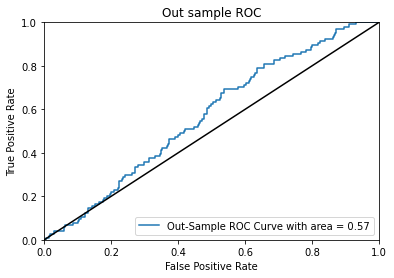

In [18]:
prediction=model_logit.predict(X_test[col])
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
(fpr, tpr, thresholds) = roc_curve(X_test["label"],prediction)
area = auc(fpr,tpr)
plt.clf() 
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)

plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC')
plt.legend(loc="lower right")
plt.show()

In [19]:
def get_KS(y_prob,y_true):
    fpr,tpr,threshold=roc_curve(y_true,y_prob)
    ks=(tpr-fpr)
    max_=np.argmax(ks)
    return threshold[max_],np.max(ks)

get_KS(prediction,X_test["label"])

(0.05142957377659856, 0.1539574752309919)

#### Fit a random forest model

In [20]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 200, max_depth=4,min_samples_split=16,random_state = 2) 
regressor.fit(X_train[col],X_train["label"])   

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=16, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

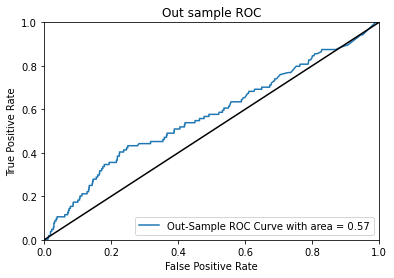

(0.07656071746081258, 0.1830541021930313)

In [21]:
prediction=regressor.predict(X_test[col])
(fpr, tpr, thresholds) = roc_curve(X_test["label"],prediction)
area = auc(fpr,tpr)
plt.clf() 
plt.plot(fpr,tpr,label="Out-Sample ROC Curve with area = %1.2f"%area)
plt.plot([0, 1], [0, 1], 'k')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Out sample ROC')
plt.legend(loc="lower right")
plt.show()
get_KS(prediction,X_test["label"])